<a href="https://colab.research.google.com/github/siddeshnaik/BeAssured-ML-Models/blob/main/BeAssuredDataCreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!tar -xf /content/drive/MyDrive/BeAssured/10.35097-1130.tar -C /content/

!unzip /content/10.35097-1130/data/dataset/OBD-II-Dataset.zip -d /content/10.35097-1130/data/dataset/

Archive:  /content/10.35097-1130/data/dataset/OBD-II-Dataset.zip
replace /content/10.35097-1130/data/dataset/OBD-II-Dataset/2017-07-05_Seat_Leon_RT_S_Stau.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/10.35097-1130/data/dataset/OBD-II-Dataset/2017-07-05_Seat_Leon_RT_S_Stau.csv  
  inflating: /content/10.35097-1130/data/dataset/OBD-II-Dataset/2017-07-05_Seat_Leon_S_KA_Normal.csv  
  inflating: /content/10.35097-1130/data/dataset/OBD-II-Dataset/2017-07-06_Seat_Leon_KA_KA_Normal.csv  
  inflating: /content/10.35097-1130/data/dataset/OBD-II-Dataset/2017-07-06_Seat_Leon_KA_RT_Normal.csv  
  inflating: /content/10.35097-1130/data/dataset/OBD-II-Dataset/2017-07-07_Seat_Leon_RT_S_Normal.csv  
  inflating: /content/10.35097-1130/data/dataset/OBD-II-Dataset/2017-07-07_Seat_Leon_S_RT_Normal.csv  
  inflating: /content/10.35097-1130/data/dataset/OBD-II-Dataset/2017-07-10_Seat_Leon_KA_KA_Stau.csv  
  inflating: /content/10.35097-1130/data/dataset/OBD-II-Dataset/2017-07-11_Seat_

In [ ]:
import os
import pandas as pd
import re

data_dir = '/content/10.35097-1130/data/dataset/OBD-II-Dataset'
csv_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f)) and f.endswith('.csv')]

print(f"Found {len(csv_files)} CSV files.")
print(csv_files[:5]) # Print the first 5 files as a sample

Found 81 CSV files.
['/content/10.35097-1130/data/dataset/OBD-II-Dataset/2017-07-24_Seat_Leon_RT_KA_Normal.csv', '/content/10.35097-1130/data/dataset/OBD-II-Dataset/2017-07-07_Seat_Leon_RT_S_Normal.csv', '/content/10.35097-1130/data/dataset/OBD-II-Dataset/2017-07-07_Seat_Leon_S_RT_Normal.csv', '/content/10.35097-1130/data/dataset/OBD-II-Dataset/2018-02-27_Seat_Leon_KA_KA_Normal.csv', '/content/10.35097-1130/data/dataset/OBD-II-Dataset/2018-03-23_Seat_Leon_S_RT_Stau.csv']


In [ ]:
import re

file_data = []
for file_path in csv_files:
    filename = os.path.basename(file_path)
    # Extract date (assuming YYYY-MM-DD format at the beginning)
    date_match = re.match(r'(\d{4}-\d{2}-\d{2})', filename)
    date = date_match.group(1) if date_match else None

    # Extract keywords (Normal, Frei, Stau, and anything following)
    keyword_match = re.search(r'(Normal|Frei|Stau)(.*)\.csv', filename)
    keywords = keyword_match.group(1) + (keyword_match.group(2) if keyword_match.group(2) else '') if keyword_match else None

    file_data.append({'file_path': file_path, 'date': date, 'keywords': keywords})

print(f"Extracted data for {len(file_data)} files.")
print(file_data[:5]) # Print the first 5 extracted data entries

Extracted data for 81 files.
[{'file_path': '/content/10.35097-1130/data/dataset/OBD-II-Dataset/2017-07-24_Seat_Leon_RT_KA_Normal.csv', 'date': '2017-07-24', 'keywords': 'Normal'}, {'file_path': '/content/10.35097-1130/data/dataset/OBD-II-Dataset/2017-07-07_Seat_Leon_RT_S_Normal.csv', 'date': '2017-07-07', 'keywords': 'Normal'}, {'file_path': '/content/10.35097-1130/data/dataset/OBD-II-Dataset/2017-07-07_Seat_Leon_S_RT_Normal.csv', 'date': '2017-07-07', 'keywords': 'Normal'}, {'file_path': '/content/10.35097-1130/data/dataset/OBD-II-Dataset/2018-02-27_Seat_Leon_KA_KA_Normal.csv', 'date': '2018-02-27', 'keywords': 'Normal'}, {'file_path': '/content/10.35097-1130/data/dataset/OBD-II-Dataset/2018-03-23_Seat_Leon_S_RT_Stau.csv', 'date': '2018-03-23', 'keywords': 'Stau'}]


In [ ]:
import pandas as pd
import os

dfs = []
for item in file_data:
    file_path = item['file_path']
    date = item['date']
    keywords = item['keywords']

    try:
        df = pd.read_csv(file_path)
        df['Date'] = date
        df['Keywords'] = keywords
        df['Filename'] = os.path.basename(file_path) # Add filename column
        dfs.append(df)
    except Exception as e:
        print(f"Error reading or processing file {file_path}: {e}")

print(f"Successfully processed and appended {len(dfs)} DataFrames.")

Successfully processed and appended 81 DataFrames.


In [ ]:
import pandas as pd

combined_obd_df = pd.concat(dfs, ignore_index=True)
display(combined_obd_df.head())
print(f"Shape of combined DataFrame: {combined_obd_df.shape}")

,Time,Engine Coolant Temperature [Â°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [Â°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [Â°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%],Date,Keywords,Filename,Engine Coolant Temperature [°C],Intake Air Temperature [°C],Ambient Air Temperature [°C]
0,07:22:24.319,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-24,Normal,2017-07-24_Seat_Leon_RT_KA_Normal.csv,NaN,NaN,NaN
1,07:22:24.410,42.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-24,Normal,2017-07-24_Seat_Leon_RT_KA_Normal.csv,NaN,NaN,NaN
2,07:22:24.500,42.0,99.0,813.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-24,Normal,2017-07-24_Seat_Leon_RT_KA_Normal.csv,NaN,NaN,NaN
3,07:22:24.590,42.0,99.0,813.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-24,Normal,2017-07-24_Seat_Leon_RT_KA_Normal.csv,NaN,NaN,NaN
4,07:22:24.680,42.0,99.0,813.0,0.0,17.0,NaN,NaN,NaN,NaN,NaN,2017-07-24,Normal,2017-07-24_Seat_Leon_RT_KA_Normal.csv,NaN,NaN,NaN


Shape of combined DataFrame: (2693824, 17)


In [ ]:
# Find all the unique keywords in the 'Keywords' column
unique_keywords = combined_obd_df['Keywords'].unique()

print("Unique keywords:")
print(unique_keywords)

Unique keywords:
['Normal' 'Stau' 'Frei' 'Frei_Vollbremsung' 'Frei_Beschleunigung'
 'Stau_Messfehler' 'Normal_Glatteis']


In [ ]:
combined_obd_df['Keywords'] = combined_obd_df['Keywords'].replace({
    'Frei': 'Free',
    'Stau': 'Busy',
    'Frei_Beschleunigung': 'Free_Acceleration',
    'Frei_Vollbremsung': 'Free_Emergency_Braking',
    'Normal_Glatteis': 'Normal_black_ice',
    'Stau_Messfehler': 'Busy_measurement_error'})

# Display the unique keywords again to confirm the changes
print("Unique keywords after replacement:")
print(combined_obd_df['Keywords'].unique())

Unique keywords after replacement:
['Normal' 'Busy' 'Free' 'Free_Emergency_Braking' 'Free_Acceleration'
 'Busy_measurement_error' 'Normal_black_ice']


In [ ]:
# Find the number of rows for each unique keyword
keyword_counts = combined_obd_df['Keywords'].value_counts()

print("Number of rows for each keyword:")
display(keyword_counts)

Number of rows for each keyword:


,count
Keywords,
Normal,1933981
Busy,420440
Free,188872
Busy_measurement_error,59634
Normal_black_ice,41611
Free_Emergency_Braking,39110
Free_Acceleration,10176


In [ ]:
# Drop rows with 'Busy_measurement_error'
combined_obd_df = combined_obd_df[combined_obd_df['Keywords'] != 'Busy_measurement_error'].copy()

# Verify the change by displaying the keyword counts again
print("Number of rows for each keyword after dropping 'Busy_measurement_error':")
display(combined_obd_df['Keywords'].value_counts())

Number of rows for each keyword after dropping 'Busy_measurement_error':


,count
Keywords,
Normal,1933981
Busy,420440
Free,188872
Normal_black_ice,41611
Free_Emergency_Braking,39110
Free_Acceleration,10176


In [ ]:
def map_special_conditions(keyword):
    if keyword == 'Normal_black_ice':
        return 'black_ice'
    elif keyword == 'Free_Emergency_Braking':
        return 'Emergency_Braking'
    elif keyword == 'Free_Acceleration':
        return 'Acceleration'
    else:
        return None

combined_obd_df['Special_Conditions'] = combined_obd_df['Keywords'].apply(map_special_conditions)

# Display the first few rows with the new column and the value counts of the new column
display(combined_obd_df[['Keywords', 'Special_Conditions']].head())
print("\nValue counts for 'Special_Conditions' column:")
display(combined_obd_df['Special_Conditions'].value_counts(dropna=False))

,Keywords,Special_Conditions
0,Normal,None
1,Normal,None
2,Normal,None
3,Normal,None
4,Normal,None



Value counts for 'Special_Conditions' column:


,count
Special_Conditions,
None,2543293
black_ice,41611
Emergency_Braking,39110
Acceleration,10176


In [ ]:
combined_obd_df['Keywords'] = combined_obd_df['Keywords'].replace({
    'Normal_black_ice': 'Normal',
    'Free_Emergency_Braking': 'Free',
    'Free_Acceleration': 'Free'
})

# Display the unique keywords again to confirm the changes
print("Unique keywords after replacement:")
display(combined_obd_df['Keywords'].unique())

# Display the value counts to see the updated distribution
print("\nValue counts for 'Keywords' column after replacement:")
display(combined_obd_df['Keywords'].value_counts())

Unique keywords after replacement:


array(['Normal', 'Busy', 'Free'], dtype=object)


Value counts for 'Keywords' column after replacement:


,count
Keywords,
Normal,1975592
Busy,420440
Free,238158


In [ ]:
# Group by 'Special_Conditions' and 'Keywords' and count the occurrences, including None
grouped_counts = combined_obd_df.groupby(['Special_Conditions', 'Keywords'], dropna=False).size().reset_index(name='Count')

# Display the result
print("Count of rows for each combination of 'Special_Conditions' and 'Keywords' (including None):")
display(grouped_counts)

Count of rows for each combination of 'Special_Conditions' and 'Keywords' (including None):


,Special_Conditions,Keywords,Count
0,Acceleration,Free,10176
1,Emergency_Braking,Free,39110
2,black_ice,Normal,41611
3,NaN,Busy,420440
4,NaN,Free,188872
5,NaN,Normal,1933981


In [ ]:
print(combined_obd_df.columns.tolist())

['Time', 'Engine Coolant Temperature [Â°C]', 'Intake Manifold Absolute Pressure [kPa]', 'Engine RPM [RPM]', 'Vehicle Speed Sensor [km/h]', 'Intake Air Temperature [Â°C]', 'Air Flow Rate from Mass Flow Sensor [g/s]', 'Absolute Throttle Position [%]', 'Ambient Air Temperature [Â°C]', 'Accelerator Pedal Position D [%]', 'Accelerator Pedal Position E [%]', 'Date', 'Keywords', 'Filename', 'Engine Coolant Temperature [°C]', 'Intake Air Temperature [°C]', 'Ambient Air Temperature [°C]', 'Special_Conditions']


In [ ]:
# Identify similar columns
temp_c_cols = ['Engine Coolant Temperature [°C]', 'Engine Coolant Temperature [Â°C]']
intake_temp_c_cols = ['Intake Air Temperature [°C]', 'Intake Air Temperature [Â°C]']
ambient_temp_c_cols = ['Ambient Air Temperature [°C]', 'Ambient Air Temperature [Â°C]']

# Merge data from similar columns into a consistent one
def merge_columns(df, cols, new_col_name):
    if not all(col in df.columns for col in cols):
        print(f"Warning: Not all specified columns {cols} are present in the DataFrame.")
        present_cols = [col for col in cols if col in df.columns]
        if not present_cols:
            print(f"Error: None of the columns {cols} are present. Cannot merge.")
            return df
        cols = present_cols
        print(f"Using only present columns: {cols}")

    if len(cols) > 1:
        # Use the first column as the base and fill missing values from subsequent columns
        df[new_col_name] = df[cols[0]]
        for col in cols[1:]:
            df[new_col_name] = df[new_col_name].fillna(df[col])
    elif len(cols) == 1:
        # If only one column is present, simply rename it
        df = df.rename(columns={cols[0]: new_col_name})
    else:
        # If no columns are present, do nothing
        print(f"No columns found to merge for {new_col_name}.")
        return df

    return df

combined_obd_df = merge_columns(combined_obd_df, temp_c_cols, 'Engine Coolant Temperature [°C]')
combined_obd_df = merge_columns(combined_obd_df, intake_temp_c_cols, 'Intake Air Temperature [°C]')
combined_obd_df = merge_columns(combined_obd_df, ambient_temp_c_cols, 'Ambient Air Temperature [°C]')


# Clean up remaining column names
combined_obd_df.columns = combined_obd_df.columns.str.strip()

# Display the updated list of columns
print("Updated columns:")
print(combined_obd_df.columns.tolist())

Updated columns:
['Time', 'Engine Coolant Temperature [Â°C]', 'Intake Manifold Absolute Pressure [kPa]', 'Engine RPM [RPM]', 'Vehicle Speed Sensor [km/h]', 'Intake Air Temperature [Â°C]', 'Air Flow Rate from Mass Flow Sensor [g/s]', 'Absolute Throttle Position [%]', 'Ambient Air Temperature [Â°C]', 'Accelerator Pedal Position D [%]', 'Accelerator Pedal Position E [%]', 'Date', 'Keywords', 'Filename', 'Engine Coolant Temperature [°C]', 'Intake Air Temperature [°C]', 'Ambient Air Temperature [°C]', 'Special_Conditions']


In [ ]:
# prompt: Drop Engine Coolant Temperature [Â°C], Intake Air Temperature [Â°C], Ambient Air Temperature [Â°C] from combined_obd_df

columns_to_drop = [
    'Engine Coolant Temperature [Â°C]',
    'Intake Air Temperature [Â°C]',
    'Ambient Air Temperature [Â°C]'
]

combined_obd_df = combined_obd_df.drop(columns=[col for col in columns_to_drop if col in combined_obd_df.columns])

display(combined_obd_df.head())
combined_obd_df.info()

,Time,Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%],Date,Keywords,Filename,Engine Coolant Temperature [°C],Intake Air Temperature [°C],Ambient Air Temperature [°C],Special_Conditions
0,07:22:24.319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-24,Normal,2017-07-24_Seat_Leon_RT_KA_Normal.csv,42.0,NaN,NaN,None
1,07:22:24.410,99.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-24,Normal,2017-07-24_Seat_Leon_RT_KA_Normal.csv,42.0,NaN,NaN,None
2,07:22:24.500,99.0,813.0,NaN,NaN,NaN,NaN,NaN,2017-07-24,Normal,2017-07-24_Seat_Leon_RT_KA_Normal.csv,42.0,NaN,NaN,None
3,07:22:24.590,99.0,813.0,0.0,NaN,NaN,NaN,NaN,2017-07-24,Normal,2017-07-24_Seat_Leon_RT_KA_Normal.csv,42.0,NaN,NaN,None
4,07:22:24.680,99.0,813.0,0.0,NaN,NaN,NaN,NaN,2017-07-24,Normal,2017-07-24_Seat_Leon_RT_KA_Normal.csv,42.0,17.0,NaN,None


<class 'pandas.core.frame.DataFrame'>
Index: 2634190 entries, 0 to 2693823
Data columns (total 15 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   Time                                       object 
 1   Intake Manifold Absolute Pressure [kPa]    float64
 2   Engine RPM [RPM]                           float64
 3   Vehicle Speed Sensor [km/h]                float64
 4   Air Flow Rate from Mass Flow Sensor [g/s]  float64
 5   Absolute Throttle Position [%]             float64
 6   Accelerator Pedal Position D [%]           float64
 7   Accelerator Pedal Position E [%]           float64
 8   Date                                       object 
 9   Keywords                                   object 
 10  Filename                                   object 
 11  Engine Coolant Temperature [°C]            float64
 12  Intake Air Temperature [°C]                float64
 13  Ambient Air Temperature [°C]               floa

In [ ]:
# Extract date and time from 'Filename' and 'Time' columns
# Assuming 'Filename' is in the format 'YYYY-MM-DD_...' and 'Time' is 'HH:MM:SS.milliseconds'
combined_obd_df['datetime_str'] = combined_obd_df['Date'] + ' ' + combined_obd_df['Time']

# Convert the combined string to datetime objects
combined_obd_df['datetime'] = pd.to_datetime(combined_obd_df['datetime_str'], errors='coerce')

# Drop the intermediate 'datetime_str' column
combined_obd_df = combined_obd_df.drop(columns=['datetime_str'])

# Set the datetime column as the index for a time series DataFrame
time_series_df = combined_obd_df.set_index('datetime')

# Display the first few rows of the new time series DataFrame
display(time_series_df.head())
time_series_df.info()

,Time,Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%],Date,Keywords,Filename,Engine Coolant Temperature [°C],Intake Air Temperature [°C],Ambient Air Temperature [°C],Special_Conditions
datetime,,,,,,,,,,,,,,,
2017-07-24 07:22:24.319,07:22:24.319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-24,Normal,2017-07-24_Seat_Leon_RT_KA_Normal.csv,42.0,NaN,NaN,None
2017-07-24 07:22:24.410,07:22:24.410,99.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-24,Normal,2017-07-24_Seat_Leon_RT_KA_Normal.csv,42.0,NaN,NaN,None
2017-07-24 07:22:24.500,07:22:24.500,99.0,813.0,NaN,NaN,NaN,NaN,NaN,2017-07-24,Normal,2017-07-24_Seat_Leon_RT_KA_Normal.csv,42.0,NaN,NaN,None
2017-07-24 07:22:24.590,07:22:24.590,99.0,813.0,0.0,NaN,NaN,NaN,NaN,2017-07-24,Normal,2017-07-24_Seat_Leon_RT_KA_Normal.csv,42.0,NaN,NaN,None
2017-07-24 07:22:24.680,07:22:24.680,99.0,813.0,0.0,NaN,NaN,NaN,NaN,2017-07-24,Normal,2017-07-24_Seat_Leon_RT_KA_Normal.csv,42.0,17.0,NaN,None


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2634190 entries, 2017-07-24 07:22:24.319000 to 2018-03-23 08:07:57.381000
Data columns (total 15 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   Time                                       object 
 1   Intake Manifold Absolute Pressure [kPa]    float64
 2   Engine RPM [RPM]                           float64
 3   Vehicle Speed Sensor [km/h]                float64
 4   Air Flow Rate from Mass Flow Sensor [g/s]  float64
 5   Absolute Throttle Position [%]             float64
 6   Accelerator Pedal Position D [%]           float64
 7   Accelerator Pedal Position E [%]           float64
 8   Date                                       object 
 9   Keywords                                   object 
 10  Filename                                   object 
 11  Engine Coolant Temperature [°C]            float64
 12  Intake Air Temperature [°C]                float64


In [ ]:
display(time_series_df.isnull().sum())

,0
Time,0
Intake Manifold Absolute Pressure [kPa],87
Engine RPM [RPM],167
Vehicle Speed Sensor [km/h],237
Air Flow Rate from Mass Flow Sensor [g/s],397
Absolute Throttle Position [%],477
Accelerator Pedal Position D [%],646
Accelerator Pedal Position E [%],716
Date,0
Keywords,0


In [ ]:
# Drop the original 'Time' and 'Date' columns
columns_to_drop = ['Time', 'Date', 'Filename']
time_series_df = time_series_df.drop(columns=[col for col in columns_to_drop if col in time_series_df.columns])

# Display the first few rows and the info to confirm the columns are dropped
display(time_series_df.head())
time_series_df.info()

,Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%],Keywords,Engine Coolant Temperature [°C],Intake Air Temperature [°C],Ambient Air Temperature [°C],Special_Conditions
datetime,,,,,,,,,,,,
2017-07-24 07:22:24.319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,42.0,NaN,NaN,None
2017-07-24 07:22:24.410,99.0,NaN,NaN,NaN,NaN,NaN,NaN,Normal,42.0,NaN,NaN,None
2017-07-24 07:22:24.500,99.0,813.0,NaN,NaN,NaN,NaN,NaN,Normal,42.0,NaN,NaN,None
2017-07-24 07:22:24.590,99.0,813.0,0.0,NaN,NaN,NaN,NaN,Normal,42.0,NaN,NaN,None
2017-07-24 07:22:24.680,99.0,813.0,0.0,NaN,NaN,NaN,NaN,Normal,42.0,17.0,NaN,None


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2634190 entries, 2017-07-24 07:22:24.319000 to 2018-03-23 08:07:57.381000
Data columns (total 12 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   Intake Manifold Absolute Pressure [kPa]    float64
 1   Engine RPM [RPM]                           float64
 2   Vehicle Speed Sensor [km/h]                float64
 3   Air Flow Rate from Mass Flow Sensor [g/s]  float64
 4   Absolute Throttle Position [%]             float64
 5   Accelerator Pedal Position D [%]           float64
 6   Accelerator Pedal Position E [%]           float64
 7   Keywords                                   object 
 8   Engine Coolant Temperature [°C]            float64
 9   Intake Air Temperature [°C]                float64
 10  Ambient Air Temperature [°C]               float64
 11  Special_Conditions                         object 
dtypes: float64(10), object(2)
memory usage: 261.3+ MB


In [ ]:
# Select all columns except 'Special_Conditions'
columns_to_check = time_series_df.columns.drop('Special_Conditions')

# Drop rows with any null values in the selected columns
time_series_df_cleaned = time_series_df.dropna(subset=columns_to_check)

print(f"Original number of rows: {len(time_series_df)}")
print(f"Number of rows after dropping NaNs (excluding 'Special_Conditions'): {len(time_series_df_cleaned)}")

# Display the first few rows of the cleaned DataFrame
display(time_series_df_cleaned.head())

# Display the number of nulls per column to verify
display(time_series_df_cleaned.isnull().sum())

Original number of rows: 2634190
Number of rows after dropping NaNs (excluding 'Special_Conditions'): 2633462


,Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%],Keywords,Engine Coolant Temperature [°C],Intake Air Temperature [°C],Ambient Air Temperature [°C],Special_Conditions
datetime,,,,,,,,,,,,
2017-07-24 07:22:25.130,99.0,813.0,0.0,9.86,14.9,14.1,14.5,Normal,42.0,17.0,16.0,None
2017-07-24 07:22:25.220,99.0,813.0,0.0,9.86,14.9,14.1,14.5,Normal,42.0,17.0,16.0,None
2017-07-24 07:22:25.310,39.0,813.0,0.0,9.86,14.9,14.1,14.5,Normal,42.0,17.0,16.0,None
2017-07-24 07:22:25.401,39.0,307.0,0.0,9.86,14.9,14.1,14.5,Normal,42.0,17.0,16.0,None
2017-07-24 07:22:25.490,39.0,307.0,0.0,9.86,14.9,14.1,14.5,Normal,42.0,17.0,16.0,None


,0
Intake Manifold Absolute Pressure [kPa],0
Engine RPM [RPM],0
Vehicle Speed Sensor [km/h],0
Air Flow Rate from Mass Flow Sensor [g/s],0
Absolute Throttle Position [%],0
Accelerator Pedal Position D [%],0
Accelerator Pedal Position E [%],0
Keywords,0
Engine Coolant Temperature [°C],0
Intake Air Temperature [°C],0


In [ ]:
display(time_series_df_cleaned.describe())

,Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%],Engine Coolant Temperature [°C],Intake Air Temperature [°C],Ambient Air Temperature [°C]
count,2.633462e+06,2.633462e+06,2.633462e+06,2.633462e+06,2.633462e+06,2.633462e+06,2.633462e+06,2.633462e+06,2.633462e+06,2.633462e+06
mean,1.252130e+02,1.494945e+03,6.212668e+01,2.263523e+01,8.121090e+01,2.157054e+01,2.189036e+01,8.139135e+01,1.925723e+01,1.009212e+01
std,3.121204e+01,5.303068e+02,4.554978e+01,1.614265e+01,1.137737e+01,1.255765e+01,1.259431e+01,1.820597e+01,1.931567e+01,1.134552e+01
min,3.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.370000e+01,1.410000e+01,1.410000e+01,-1.000000e+00,-4.000000e+01,-1.400000e+01
25%,1.040000e+02,1.115000e+03,1.900000e+01,1.169000e+01,8.350000e+01,1.410000e+01,1.450000e+01,8.500000e+01,7.000000e+00,0.000000e+00
50%,1.140000e+02,1.540000e+03,6.000000e+01,1.861000e+01,8.350000e+01,1.410000e+01,1.450000e+01,9.000000e+01,1.800000e+01,1.100000e+01
75%,1.360000e+02,1.848000e+03,1.020000e+02,2.905000e+01,8.350000e+01,2.670000e+01,2.670000e+01,9.100000e+01,2.800000e+01,2.000000e+01
max,2.470000e+02,4.315000e+03,2.180000e+02,1.292200e+02,8.900000e+01,8.510000e+01,8.430000e+01,1.030000e+02,1.500000e+02,3.300000e+01


In [ ]:
selected_columns = [
    'Engine RPM [RPM]',
    'Vehicle Speed Sensor [km/h]',
    'Engine Coolant Temperature [°C]',
    'Intake Air Temperature [°C]',
    'Ambient Air Temperature [°C]'
]

for col in selected_columns:
    if col in time_series_df_cleaned.columns:
        print(f"Analysis for column: {col}")
        display(time_series_df_cleaned[col].value_counts().head())
        print(f"Mean: {time_series_df_cleaned[col].mean()}")
        print(f"Median: {time_series_df_cleaned[col].median()}")
        print(f"Standard Deviation: {time_series_df_cleaned[col].std()}")
        print("-" * 30)

Analysis for column: Engine RPM [RPM]


,count
Engine RPM [RPM],
0.0,92041
1040.0,22273
770.0,21203
769.0,20636
900.0,20436


Mean: 1494.9448220631245
Median: 1540.0
Standard Deviation: 530.3068306310003
------------------------------
Analysis for column: Vehicle Speed Sensor [km/h]


,count
Vehicle Speed Sensor [km/h],
0.0,298666
125.0,84220
86.0,56640
124.0,36490
105.0,36040


Mean: 62.12667773448032
Median: 60.0
Standard Deviation: 45.54978339488492
------------------------------
Analysis for column: Engine Coolant Temperature [°C]


,count
Engine Coolant Temperature [°C],
90.0,849727
91.0,531966
89.0,292569
92.0,93136
88.0,72094


Mean: 81.39134568867901
Median: 90.0
Standard Deviation: 18.20597016508022
------------------------------
Analysis for column: Intake Air Temperature [°C]


,count
Intake Air Temperature [°C],
7.0,94481
29.0,85977
6.0,84870
28.0,83306
25.0,82990


Mean: 19.257233633900928
Median: 18.0
Standard Deviation: 19.31567167159166
------------------------------
Analysis for column: Ambient Air Temperature [°C]


,count
Ambient Air Temperature [°C],
0.0,157973
20.0,147590
23.0,129405
21.0,127739
22.0,117226


Mean: 10.092116385199407
Median: 11.0
Standard Deviation: 11.345522524755847
------------------------------


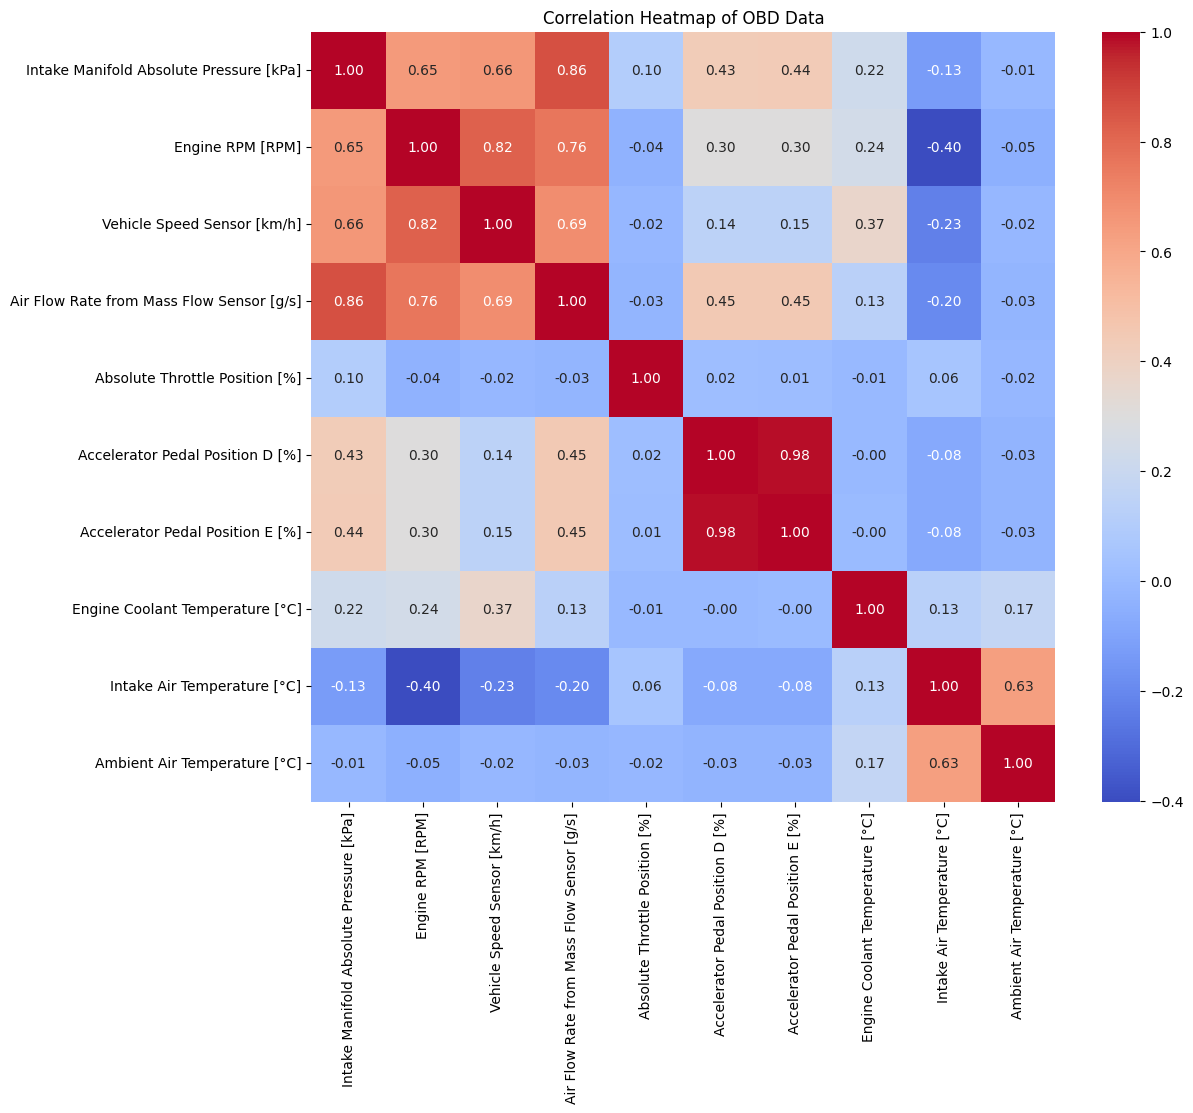

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
numerical_cols = time_series_df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = time_series_df_cleaned[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of OBD Data')
plt.show()

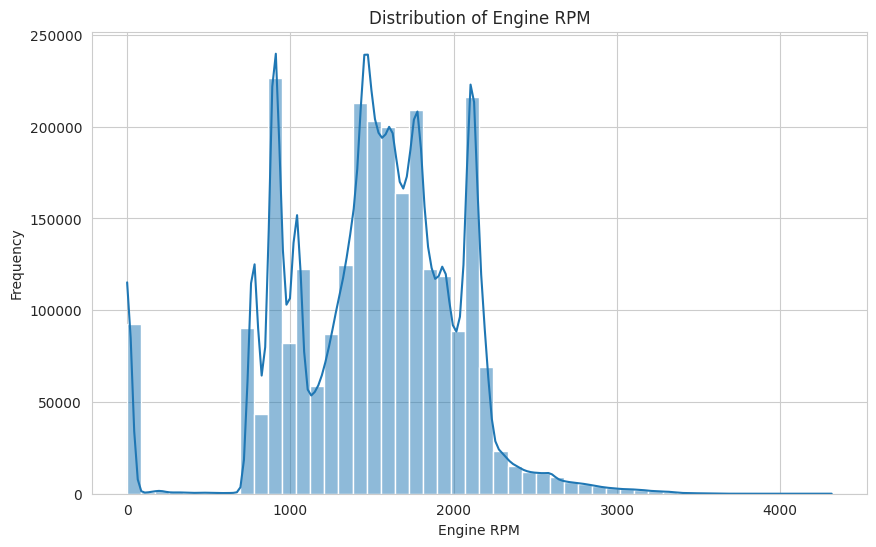

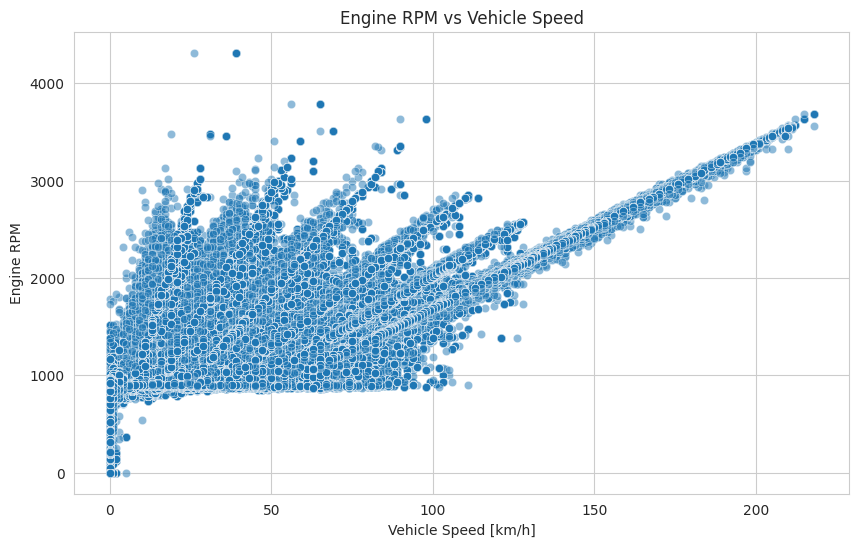

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set_style("whitegrid")

# 1. Histogram for Engine RPM
plt.figure(figsize=(10, 6))
sns.histplot(time_series_df_cleaned['Engine RPM [RPM]'].dropna(), bins=50, kde=True)
plt.xlabel('Engine RPM')
plt.ylabel('Frequency')
plt.title('Distribution of Engine RPM')
plt.show()

# Additional visualizations (Scatter plot between Engine RPM and Vehicle Speed)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vehicle Speed Sensor [km/h]', y='Engine RPM [RPM]', data=time_series_df_cleaned.dropna(subset=['Vehicle Speed Sensor [km/h]', 'Engine RPM [RPM]']), alpha=0.5)
plt.xlabel('Vehicle Speed [km/h]')
plt.ylabel('Engine RPM')
plt.title('Engine RPM vs Vehicle Speed')
plt.show()

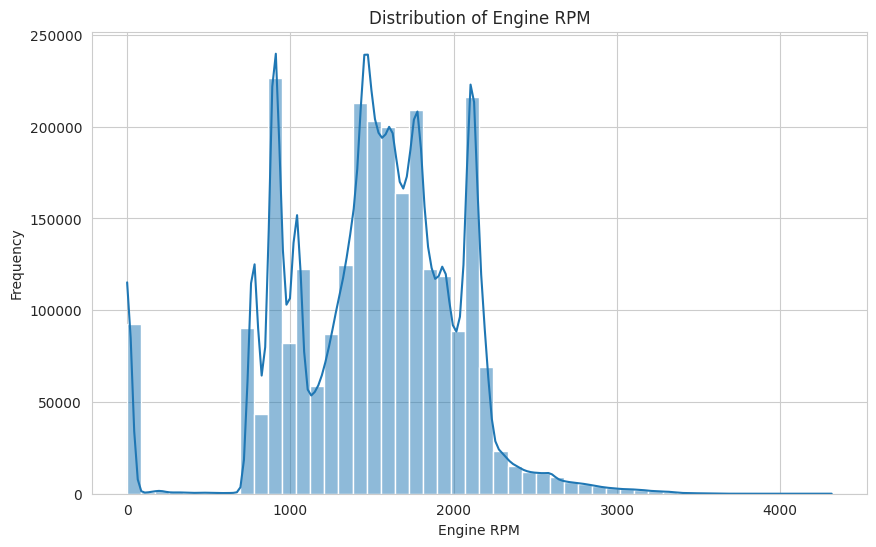

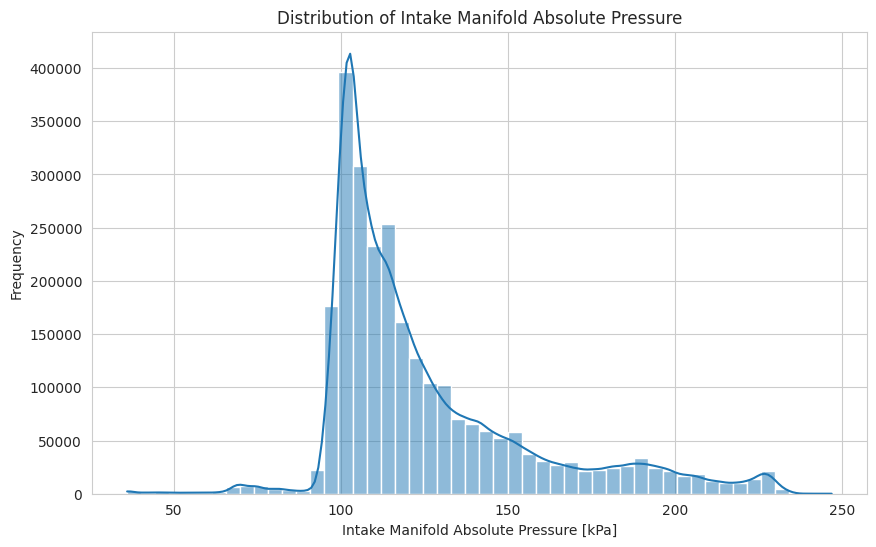

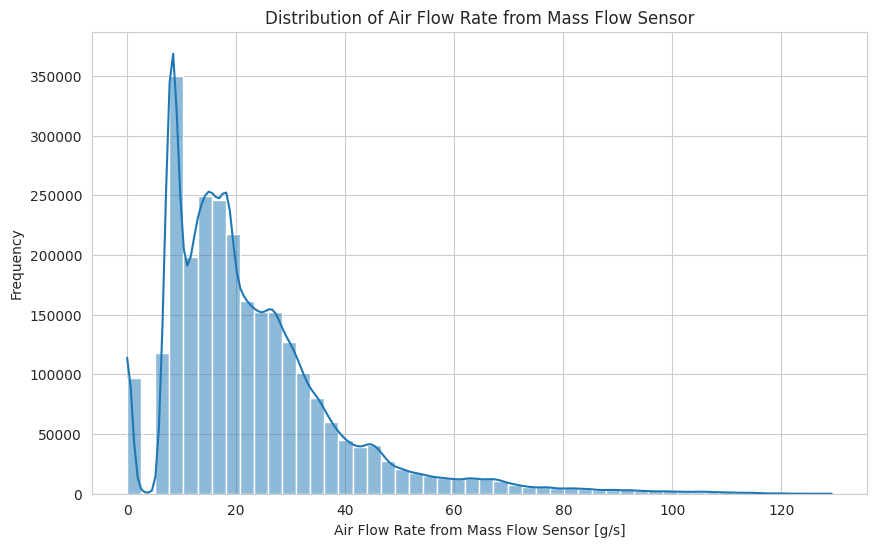

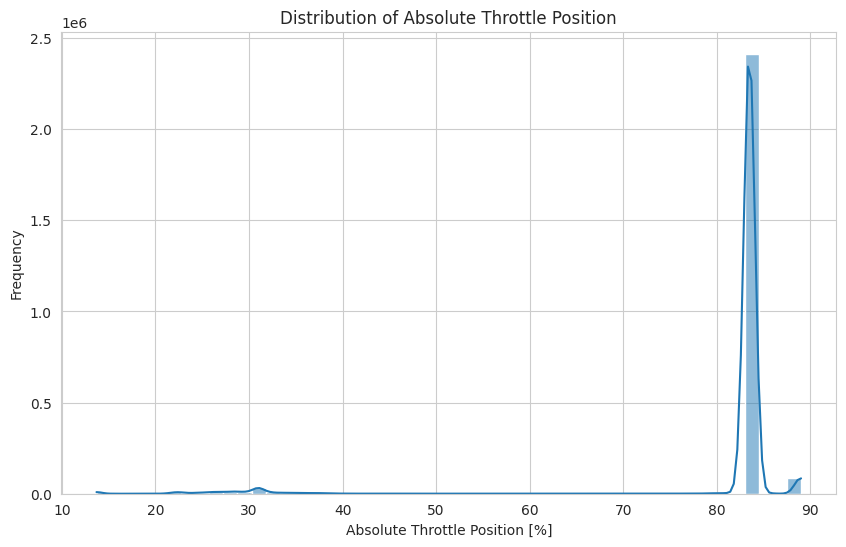

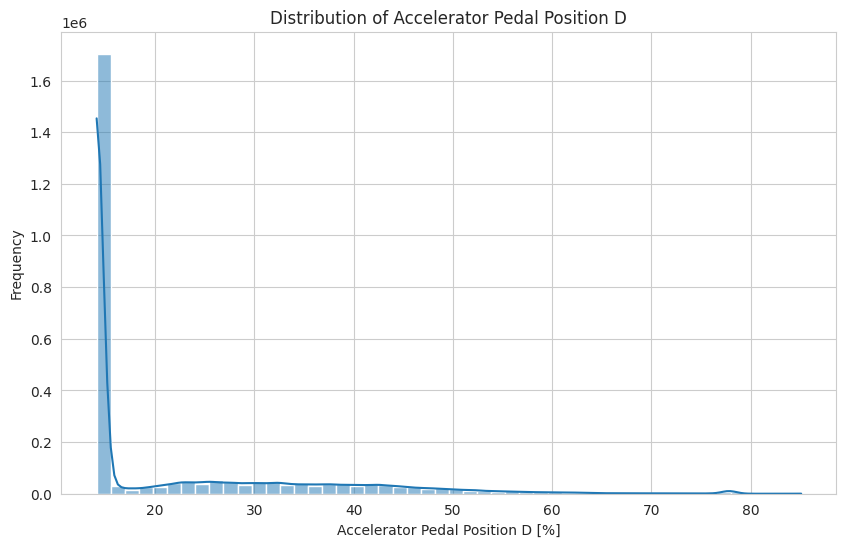

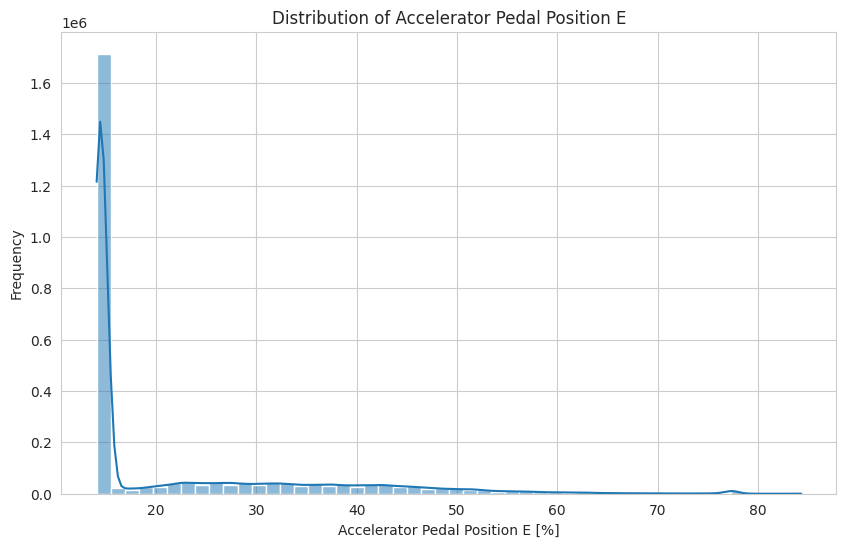

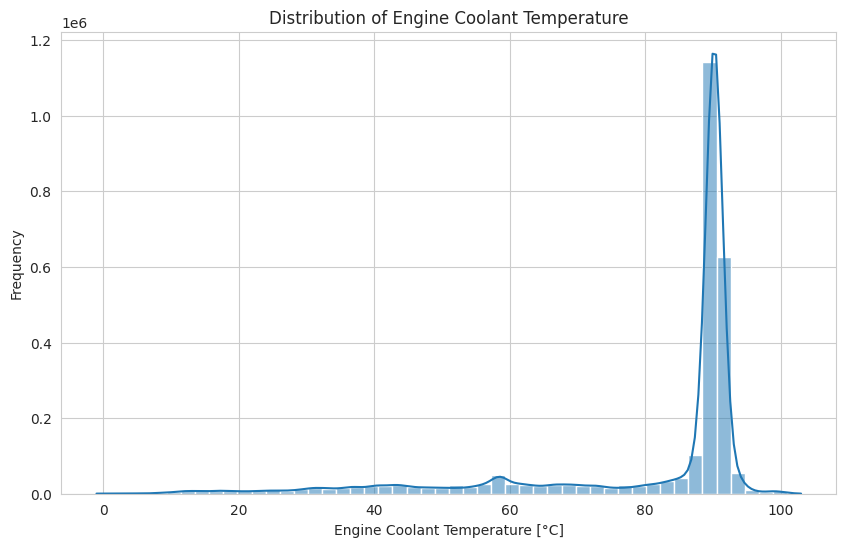

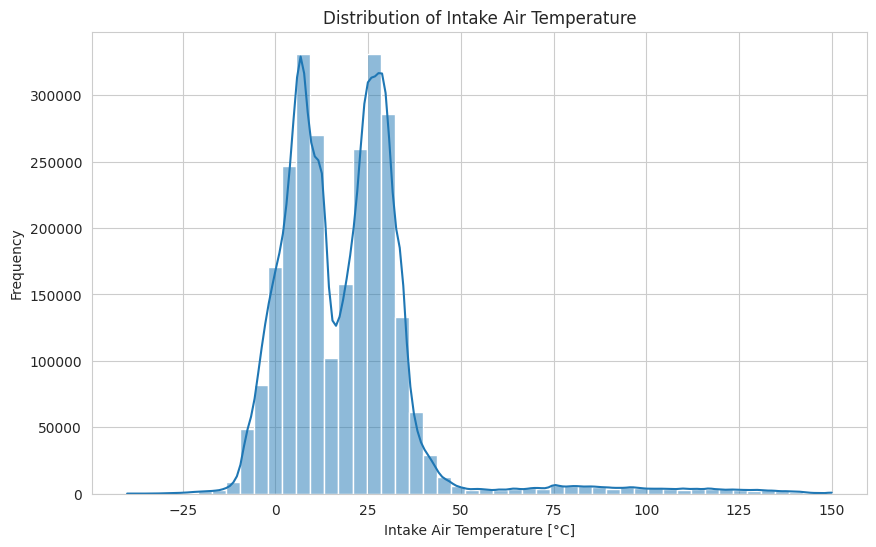

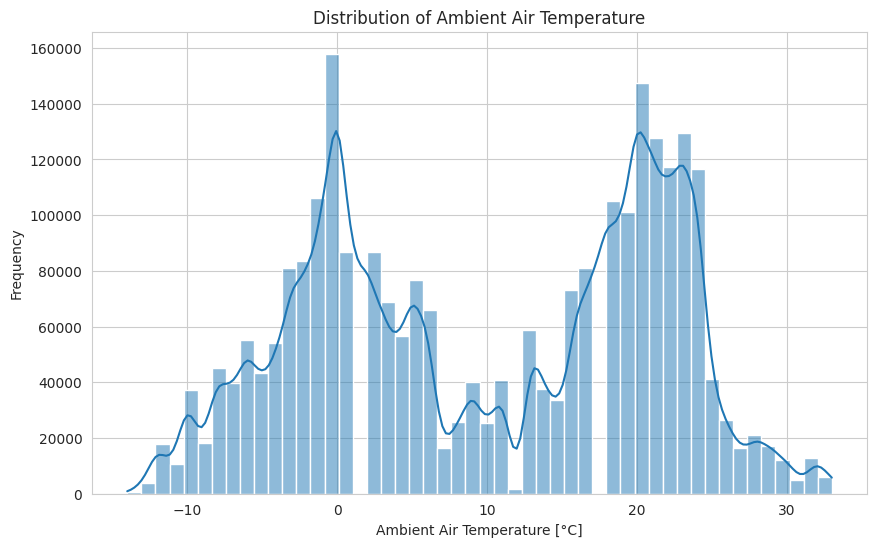

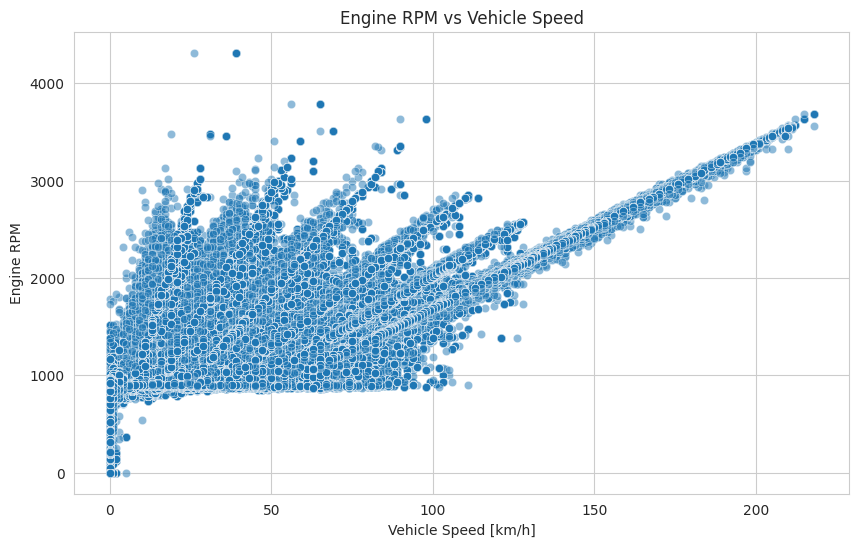

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set_style("whitegrid")

# 1. Histogram for Engine RPM
plt.figure(figsize=(10, 6))
sns.histplot(time_series_df_cleaned['Engine RPM [RPM]'].dropna(), bins=50, kde=True)
plt.xlabel('Engine RPM')
plt.ylabel('Frequency')
plt.title('Distribution of Engine RPM')
plt.show()

# 2. Histogram for Intake Manifold Absolute Pressure
if 'Intake Manifold Absolute Pressure [kPa]' in time_series_df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(time_series_df_cleaned['Intake Manifold Absolute Pressure [kPa]'].dropna(), bins=50, kde=True)
    plt.xlabel('Intake Manifold Absolute Pressure [kPa]')
    plt.ylabel('Frequency')
    plt.title('Distribution of Intake Manifold Absolute Pressure')
    plt.show()
else:
    print("Intake Manifold Absolute Pressure [kPa] column not found.")


# 3. Histogram for Air Flow Rate from Mass Flow Sensor
if 'Air Flow Rate from Mass Flow Sensor [g/s]' in time_series_df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(time_series_df_cleaned['Air Flow Rate from Mass Flow Sensor [g/s]'].dropna(), bins=50, kde=True)
    plt.xlabel('Air Flow Rate from Mass Flow Sensor [g/s]')
    plt.ylabel('Frequency')
    plt.title('Distribution of Air Flow Rate from Mass Flow Sensor')
    plt.show()
else:
    print("Air Flow Rate from Mass Flow Sensor [g/s] column not found.")

# 4. Histogram for Absolute Throttle Position
if 'Absolute Throttle Position [%]' in time_series_df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(time_series_df_cleaned['Absolute Throttle Position [%]'].dropna(), bins=50, kde=True)
    plt.xlabel('Absolute Throttle Position [%]')
    plt.ylabel('Frequency')
    plt.title('Distribution of Absolute Throttle Position')
    plt.show()
else:
    print("Absolute Throttle Position [%] column not found.")

# 5. Histogram for Accelerator Pedal Position D
if 'Accelerator Pedal Position D [%]' in time_series_df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(time_series_df_cleaned['Accelerator Pedal Position D [%]'].dropna(), bins=50, kde=True)
    plt.xlabel('Accelerator Pedal Position D [%]')
    plt.ylabel('Frequency')
    plt.title('Distribution of Accelerator Pedal Position D')
    plt.show()
else:
    print("Accelerator Pedal Position D [%] column not found.")

# 6. Histogram for Accelerator Pedal Position E
if 'Accelerator Pedal Position E [%]' in time_series_df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(time_series_df_cleaned['Accelerator Pedal Position E [%]'].dropna(), bins=50, kde=True)
    plt.xlabel('Accelerator Pedal Position E [%]')
    plt.ylabel('Frequency')
    plt.title('Distribution of Accelerator Pedal Position E')
    plt.show()
else:
    print("Accelerator Pedal Position E [%] column not found.")


# 7. Histogram for Engine Coolant Temperature
if 'Engine Coolant Temperature [°C]' in time_series_df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(time_series_df_cleaned['Engine Coolant Temperature [°C]'].dropna(), bins=50, kde=True)
    plt.xlabel('Engine Coolant Temperature [°C]')
    plt.ylabel('Frequency')
    plt.title('Distribution of Engine Coolant Temperature')
    plt.show()
else:
    print("Engine Coolant Temperature [°C] column not found.")


# 8. Histogram for Intake Air Temperature
if 'Intake Air Temperature [°C]' in time_series_df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(time_series_df_cleaned['Intake Air Temperature [°C]'].dropna(), bins=50, kde=True)
    plt.xlabel('Intake Air Temperature [°C]')
    plt.ylabel('Frequency')
    plt.title('Distribution of Intake Air Temperature')
    plt.show()
else:
    print("Intake Air Temperature [°C] column not found.")

# 9. Histogram for Ambient Air Temperature
if 'Ambient Air Temperature [°C]' in time_series_df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(time_series_df_cleaned['Ambient Air Temperature [°C]'].dropna(), bins=50, kde=True)
    plt.xlabel('Ambient Air Temperature [°C]')
    plt.ylabel('Frequency')
    plt.title('Distribution of Ambient Air Temperature')
    plt.show()
else:
     print("Ambient Air Temperature [°C] column not found.")


# 10. Scatter plot between Engine RPM and Vehicle Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vehicle Speed Sensor [km/h]', y='Engine RPM [RPM]', data=time_series_df_cleaned.dropna(subset=['Vehicle Speed Sensor [km/h]', 'Engine RPM [RPM]']), alpha=0.5)
plt.xlabel('Vehicle Speed [km/h]')
plt.ylabel('Engine RPM')
plt.title('Engine RPM vs Vehicle Speed')
plt.show()


Generating graphs for Cluster 0:


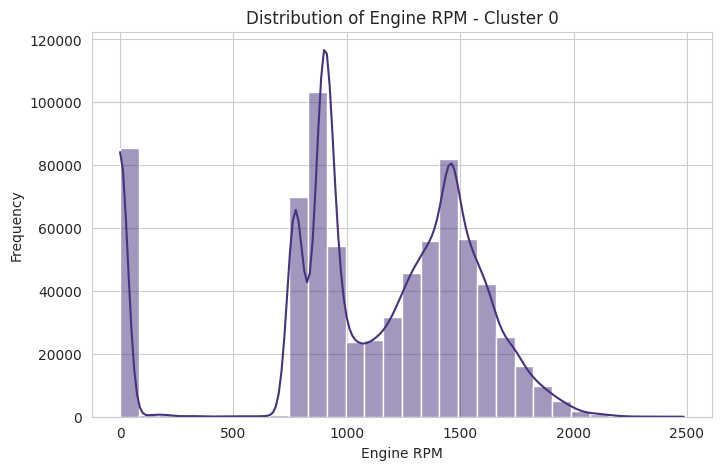

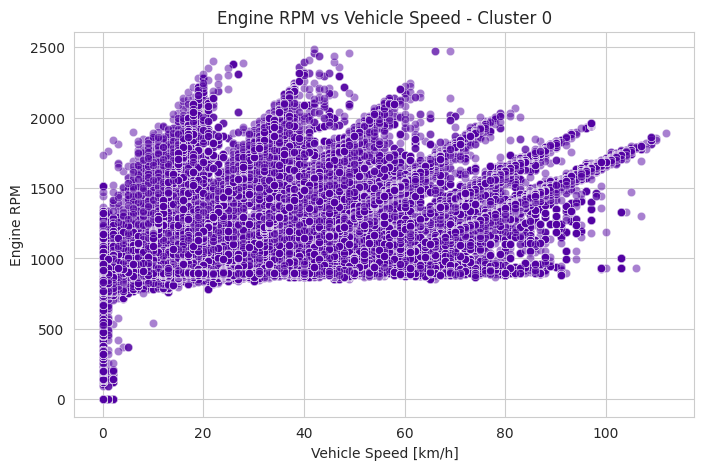

----------------------------------------

Generating graphs for Cluster 1:


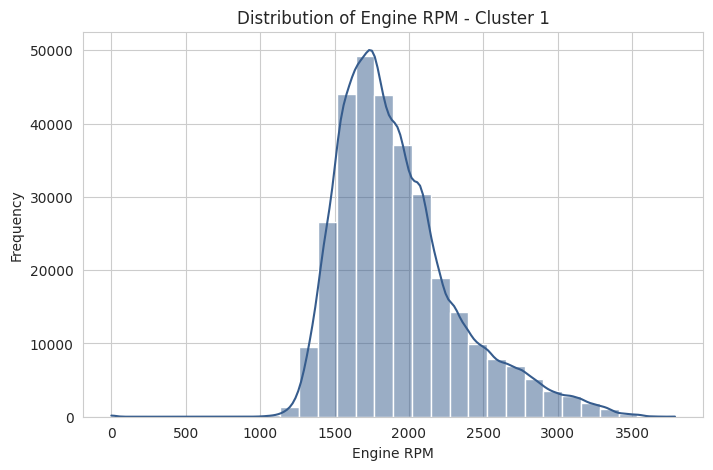

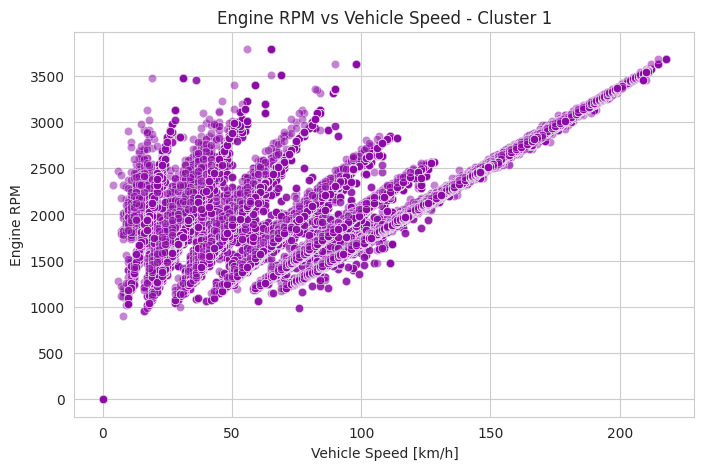

----------------------------------------

Generating graphs for Cluster 2:


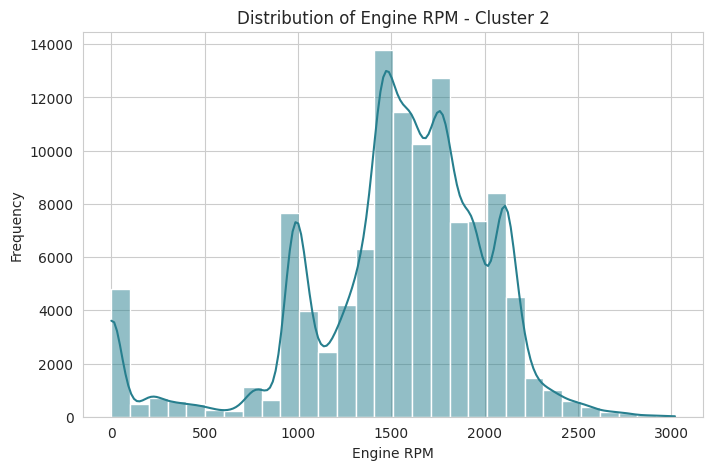

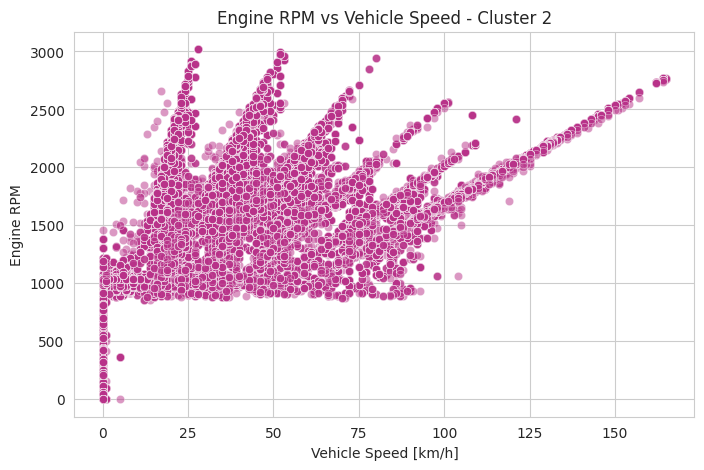

----------------------------------------

Generating graphs for Cluster 3:


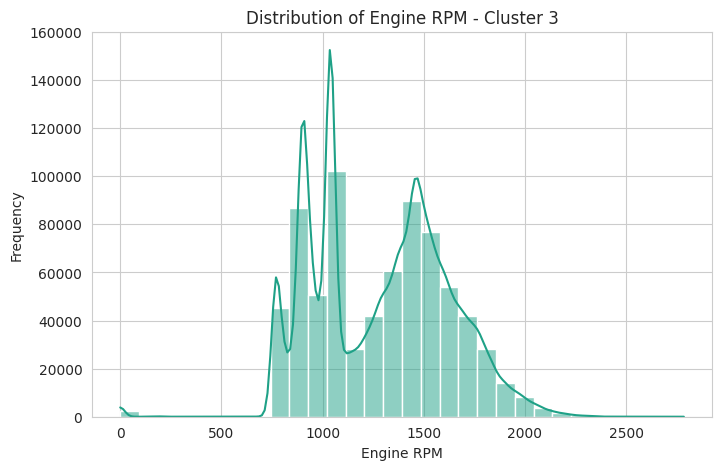

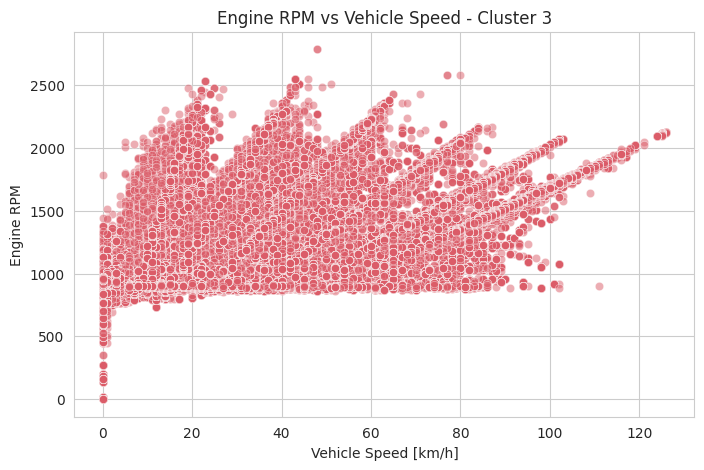

----------------------------------------

Generating graphs for Cluster 4:


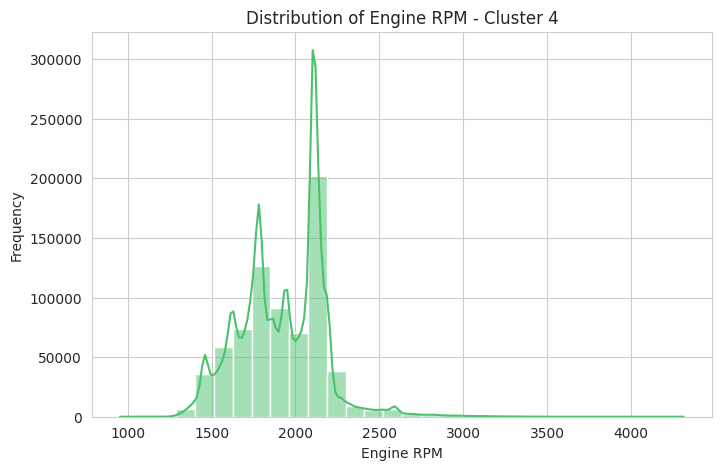

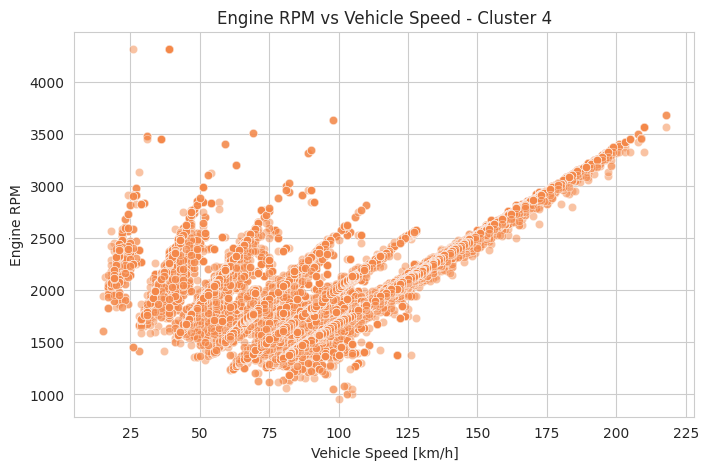

----------------------------------------


In [ ]:
import matplotlib.pyplot as plt
# Generate graphs for each cluster
for cluster_id in range(n_clusters):
    cluster_df = data_for_clustering[data_for_clustering['KMeans Cluster'] == cluster_id]
    print(f"\nGenerating graphs for Cluster {cluster_id}:")

    # Example: Distribution of Engine RPM for this cluster
    if 'Engine RPM [RPM]' in cluster_df.columns and not cluster_df['Engine RPM [RPM]'].dropna().empty:
        plt.figure(figsize=(8, 5))
        sns.histplot(cluster_df['Engine RPM [RPM]'].dropna(), bins=30, kde=True, color=sns.color_palette("viridis")[cluster_id % len(sns.color_palette("viridis"))])
        plt.xlabel('Engine RPM')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Engine RPM - Cluster {cluster_id}')
        plt.show()
    else:
        print(f"No valid Engine RPM data for Cluster {cluster_id}")


    # Example: Scatter plot of Vehicle Speed vs Engine RPM for this cluster
    if 'Vehicle Speed Sensor [km/h]' in cluster_df.columns and 'Engine RPM [RPM]' in cluster_df.columns and not cluster_df[['Vehicle Speed Sensor [km/h]', 'Engine RPM [RPM]']].dropna().empty:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x='Vehicle Speed Sensor [km/h]', y='Engine RPM [RPM]', data=cluster_df.dropna(subset=['Vehicle Speed Sensor [km/h]', 'Engine RPM [RPM]']), alpha=0.5, color=sns.color_palette("plasma")[cluster_id % len(sns.color_palette("plasma"))])
        plt.xlabel('Vehicle Speed [km/h]')
        plt.ylabel('Engine RPM')
        plt.title(f'Engine RPM vs Vehicle Speed - Cluster {cluster_id}')
        plt.show()
    else:
        print(f"No valid Vehicle Speed or Engine RPM data for scatter plot in Cluster {cluster_id}")

    print("-" * 40)

In [ ]:
# Drop 'KMeans Cluster' and 'Isolation Forest' columns before saving
columns_to_drop_for_saving = ['KMeans Cluster', 'Isolation Forest']
data_to_save = data_for_clustering.drop(columns=[col for col in columns_to_drop_for_saving if col in data_for_clustering.columns])

# Define the path to save the CSV file
output_csv_path = '/content/cleaned_obd_data.csv'

# Save the DataFrame to a CSV file
data_to_save.to_csv(output_csv_path)

print(f"DataFrame saved to {output_csv_path}")

DataFrame saved to /content/cleaned_obd_data.csv
